In [2]:
import pandas as pd

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Airbnb_Open_Data.csv')

c:\users\c_sam\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [6]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [7]:
df['country code'].isna().count()
#there are lot of country code which are blank and since it is a data set for Newyork, the country code is US but there is really no need
# for these 2 columns so we might drop them later

102599

In [8]:
df['service fee'] = df['service fee'].str.replace('$','') # remove the $ sign from the service fee.

C:\Users\c_sam\AppData\Local\Temp\ipykernel_15796\1493900769.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['service fee'] = df['service fee'].str.replace('$','') # remove the $ sign from the service fee.


In [9]:
df['service fee'] = pd.to_numeric(df['service fee'])

In [10]:
df['price'] = df['price'].str.replace('$','')
df['price'] = df['price'].str.replace(',','')

C:\Users\c_sam\AppData\Local\Temp\ipykernel_15796\254186259.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$','')


In [11]:
df['price'] = pd.to_numeric(df['price'])

In [12]:
df['price'].head()

0    966.0
1    142.0
2    620.0
3    368.0
4    204.0
Name: price, dtype: float64

In [13]:
df['neighbourhood group'].unique() 

array(['Brooklyn', 'Manhattan', 'brookln', 'manhatan', 'Queens', nan,
       'Staten Island', 'Bronx'], dtype=object)

In [14]:
# we need to change brooklyn to Brooklyn and manhattan to Manhattan
df['neighbourhood group'] = df['neighbourhood group'].str.replace('brookln','Brooklyn')
df['neighbourhood group'] = df['neighbourhood group'].str.replace('manhatan','Manhattan')

In [15]:
df['neighbourhood group'].unique() # we need to confirm that we have fixed the case so that we don't have 
#duplicate neighborhood group

array(['Brooklyn', 'Manhattan', 'Queens', nan, 'Staten Island', 'Bronx'],
      dtype=object)

In [18]:
#need to get rid of nan

In [16]:
df['neighbourhood group'] = df['neighbourhood group'].fillna(method='ffill')

In [17]:
df['neighbourhood group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [19]:
df['neighbourhood'].unique() 

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [20]:
#there is nan in neighbourhood too. We need to fix this too.
df['neighbourhood'] = df['neighbourhood'].fillna(method='ffill')

In [21]:
df['neighbourhood'].unique() 

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [22]:
df.license.unique()

array([nan, '41662/AL'], dtype=object)

In [23]:
df[df.license == '41662/AL']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
11114,7139598,"Cozy 1 BR on Bedford Avenue, Wburg",73023181304,verified,Christina,Brooklyn,Williamsburg,40.71764,-73.95689,United States,...,140.0,1.0,1.0,1/3/2016,0.02,1.0,1.0,191.0,"Dear Guest, Thank you for appreciating that I ...",41662/AL
72947,41289964,"Cozy 1 BR on Bedford Avenue, Wburg",25804773951,unconfirmed,Christina,Brooklyn,Williamsburg,40.71764,-73.95689,United States,...,140.0,1.0,1.0,1/3/2016,0.02,1.0,1.0,0.0,NaN,41662/AL


In [24]:
#most of the values in the license column are null so we can drop it. We will also drop the columns country and country code
df.drop(columns=['license','country','country code'],inplace = True)

In [25]:
df[df['availability 365'] <0]

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,instant_bookable,...,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules
139,1078106,FLAT MACDONOUGH,12359551036,unconfirmed,Frederick,Brooklyn,Bedford-Stuyvesant,40.68296,-73.93662,False,...,593.0,119.0,NaN,227.0,6/23/2019,2.09,5.0,2.0,-10.0,NaN
142,1079763,"Sun-drenched, artsy modernist 1 BDRM duplex",83716006050,unconfirmed,Kellan,Brooklyn,Williamsburg,40.71561,-73.94835,True,...,658.0,132.0,NaN,10.0,NaN,0.10,5.0,1.0,-2.0,Quiet after 11pm. Other guests sleeping.
170,1095227,New York room with a view,95792367490,NaN,Dexter,Staten Island,St. George,40.64524,-74.08088,True,...,1015.0,203.0,131.0,166.0,6/13/2019,1.66,4.0,1.0,-1.0,Please tell me about who you will be traveling...
236,1131679,NaN,74291995690,unconfirmed,Cameron,Manhattan,East Harlem,40.79163,-73.94573,False,...,1052.0,210.0,28.0,183.0,9/29/2018,1.83,2.0,2.0,-6.0,- We have school age children and request that...
251,1139963,B NYC Staten Alternative...,13992927619,NaN,Fowler,Staten Island,Tompkinsville,40.63627,-74.08543,True,...,784.0,157.0,2.0,147.0,NaN,NaN,NaN,6.0,-1.0,"Rules are detailed in the House Manual, which ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86735,48905077,Comfortable 2 BR in East Village/Cooper Square,66319244844,unconfirmed,Cooper,Manhattan,East Village,40.72627,-73.99145,True,...,335.0,67.0,3.0,27.0,4/23/2019,0.76,5.0,1.0,-4.0,No Smoking in the Apartment. Pretty laid back...
86764,48921093,"Beautiful hip location, with a light of sunshine.",11182626298,verified,Noemi,Queens,Ridgewood,40.70971,-73.89741,False,...,606.0,121.0,28.0,1.0,9/15/2018,0.10,4.0,1.0,-2.0,NaN
86790,48935453,Beautiful Quiet Bedroom near City College,59344299465,unconfirmed,Erika,Manhattan,Harlem,40.81863,-73.95295,False,...,948.0,190.0,2.0,0.0,NaN,NaN,4.0,3.0,-7.0,Please be respectful of other guests. Keep th...
86853,48970248,West Chelsea 1 bedroom 2 bathroom outdoor space.,34380933090,unconfirmed,Alison,Manhattan,Chelsea,40.74584,-74.00279,True,...,651.0,130.0,14.0,0.0,NaN,NaN,5.0,1.0,-7.0,- $20 per extra person. Maximum 2 person for a...


In [26]:
df[df['availability 365'] >365]

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,instant_bookable,...,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,True,...,577.0,115.0,3.0,74.0,6/22/2019,0.59,3.0,1.0,374.0,"No smoking, please, and no drugs."
9,1006307,Cozy Clean Guest Room - Family Apt,75527839483,unconfirmed,Carl,Manhattan,Upper West Side,40.80178,-73.96723,False,...,291.0,58.0,2.0,118.0,7/21/2017,0.99,5.0,1.0,375.0,NO SMOKING OR PETS ANYWHERE ON THE PROPERTY 1....
25,1015144,"MAISON DES SIRENES1,bohemian apartment",48387947293,NaN,Miranda,Brooklyn,Bedford-Stuyvesant,40.68371,-73.94028,NaN,...,1175.0,235.0,2.0,88.0,6/19/2019,0.73,4.0,2.0,372.0,NaN
33,1019562,Loft in Williamsburg Area w/ Roof,50968902783,unconfirmed,John,Brooklyn,Greenpoint,40.72219,-73.93762,NaN,...,858.0,172.0,4.0,197.0,6/15/2019,1.65,NaN,3.0,383.0,LAUNDRY - Laundry can be done by the visitor b...
34,1020114,back room/bunk beds,25066620900,verified,Alfred,Manhattan,Harlem,40.82130,-73.95318,NaN,...,545.0,109.0,3.0,273.0,7/1/2019,2.37,NaN,3.0,411.0,Please no smoking on the property
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102582,6085810,Private room in the best part of BK,4746552394,verified,Brad,Brooklyn,Crown Heights,40.66743,-73.94712,False,...,516.0,103.0,7.0,49.0,6/1/2019,1.01,2.0,1.0,425.0,No Smoking. Pets Allowed with fee.
102584,6086914,2 block walk from the beach in NYC,70051719594,verified,Vladimir,Queens,Arverne,40.59270,-73.78990,False,...,566.0,113.0,2.0,89.0,5/26/2019,1.82,2.0,1.0,394.0,NaN
102588,6089124,"Loft Space for Events, Meetings & Shoots",85557432222,unconfirmed,Kalin,Manhattan,Flatiron District,40.74068,-73.98999,True,...,618.0,124.0,1.0,177.0,6/29/2019,3.78,4.0,1.0,410.0,Keep the apartment clean and damage free please.
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,True,...,837.0,167.0,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...


In [27]:
df['availability 365'] = df['availability 365'].abs()

In [28]:
df[df['availability 365'] <0]

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,instant_bookable,...,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules


In [29]:
df['cancellation_policy'].unique()


array(['strict', 'moderate', 'flexible', nan], dtype=object)

In [30]:
df['cancellation_policy'].fillna('moderate') 
# convert all the nan to moderate since this might be the safest approach. A good middle ground between strict and flexible 

0           strict
1         moderate
2         flexible
3         moderate
4         moderate
            ...   
102594    flexible
102595    moderate
102596    moderate
102597      strict
102598    flexible
Name: cancellation_policy, Length: 102599, dtype: object

In [31]:
df['cancellation_policy'].unique() # lets us check if fillna really worked.

array(['strict', 'moderate', 'flexible', nan], dtype=object)

In [32]:
df['cancellation_policy'] = df['cancellation_policy'].astype(str)

In [33]:
df['cancellation_policy'].fillna('moderate',inplace = True) 

In [34]:
df['cancellation_policy'].unique()

array(['strict', 'moderate', 'flexible', 'nan'], dtype=object)

In [35]:
df['cancellation_policy'] = df['cancellation_policy'].str.replace('nan','moderate')

In [36]:
df['cancellation_policy'].unique()

array(['strict', 'moderate', 'flexible'], dtype=object)

In [37]:
df['cancellation_policy'].nunique()

3

In [38]:
cleaned_df = df

In [39]:
cleaned_df.to_csv('Airbnb_cleaned_dataset')

<AxesSubplot:>

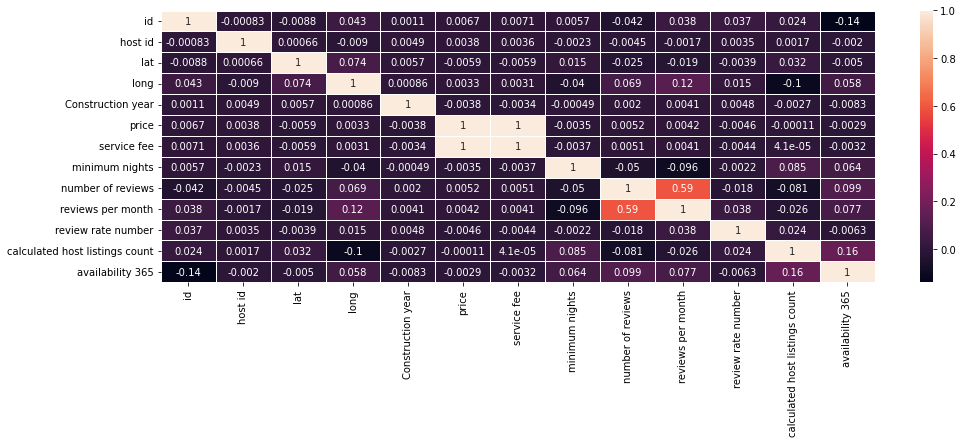

In [44]:
import seaborn as sns
corr = cleaned_df.corr()
plt.figure(figsize = (16,5))
sns.heatmap(corr,annot=True,linewidth=0.7)

In [45]:
df.describe()

,id,host id,lat,long,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102385.000000,102352.000000,102326.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,2012.487464,625.293536,125.026924,8.135845,27.483743,1.374022,3.279106,7.936605,141.179284
std,1.625751e+07,2.853900e+10,0.055857,0.049521,5.765556,331.671614,66.325739,30.553781,49.508954,1.746621,1.284657,32.218780,135.387040
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,50.000000,10.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,0.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,2007.000000,340.000000,68.000000,2.000000,1.000000,0.220000,2.000000,1.000000,4.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,2012.000000,624.000000,125.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,2017.000000,913.000000,183.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000
